In [5]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import emoji
%matplotlib inline 

#importing rdkit
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Descriptors
from rdkit import RDConfig
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
#from utility import FeatureGenerator
from rdkit.Chem import PandasTools as PandasTools
from rdkit import DataStructs
from rdkit.Chem.Subshape import SubshapeBuilder,SubshapeAligner,SubshapeObjects

#importing sklearn 
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
import pandas as pd

In [8]:
sol = pd.read_csv('D:/python/rdkit/new222.csv')
print(sol.head)

<bound method NDFrame.head of                                          SMILES  \
0                                ClCC(Cl)(Cl)Cl   
1                                  CC(Cl)(Cl)Cl   
2                                ClC(Cl)C(Cl)Cl   
3                                    ClCC(Cl)Cl   
4                           FC(F)(Cl)C(F)(Cl)Cl   
...                                         ...   
2003   O=[N+]([O-])c1c(O)c(C)cc([N+](=O)[O-])c1   
2004      O=C(OC(C)(C)C)N[C@H](C(=O)O)Cc1ccccc1   
2005                        Cc1ccc(c2ccccc2)cc1   
2006    S(=O)(=O)(Nc1nc(OC)nc(OC)c1)c1ccc(N)cc1   
2007  Clc1c(S(=O)(=O)N)cc(C(=O)O)c(NCc2occc2)c1   

      measured log(solubility:mol/L)  
0                           -2.18000  
1                           -2.00000  
2                           -1.74000  
3                           -1.48000  
4                           -3.04000  
...                              ...  
2003                        -1.46000  
2004                        -2.15490  
2005  

In [9]:
from rdkit.Chem import AllChem
from rdkit import Chem
import pandas as pd

sol = pd.read_csv('D:/python/rdkit/new222.csv')
print(sol.head)
XY = sol.set_index('SMILES').T.to_dict('list')

<bound method NDFrame.head of                                          SMILES  \
0                                ClCC(Cl)(Cl)Cl   
1                                  CC(Cl)(Cl)Cl   
2                                ClC(Cl)C(Cl)Cl   
3                                    ClCC(Cl)Cl   
4                           FC(F)(Cl)C(F)(Cl)Cl   
...                                         ...   
2003   O=[N+]([O-])c1c(O)c(C)cc([N+](=O)[O-])c1   
2004      O=C(OC(C)(C)C)N[C@H](C(=O)O)Cc1ccccc1   
2005                        Cc1ccc(c2ccccc2)cc1   
2006    S(=O)(=O)(Nc1nc(OC)nc(OC)c1)c1ccc(N)cc1   
2007  Clc1c(S(=O)(=O)N)cc(C(=O)O)c(NCc2occc2)c1   

      measured log(solubility:mol/L)  
0                           -2.18000  
1                           -2.00000  
2                           -1.74000  
3                           -1.48000  
4                           -3.04000  
...                              ...  
2003                        -1.46000  
2004                        -2.15490  
2005  

In [10]:
#descriptor
molecules = sol.SMILES.apply(Chem.MolFromSmiles)

In [11]:
sol.loc[:, 'MolLogP'] = molecules.apply(Descriptors.MolLogP)
sol.loc[:, 'HeavyAtomCount'] = molecules.apply(Descriptors.HeavyAtomCount)
sol.loc[:, 'HAccept'] = molecules.apply(Descriptors.NumHAcceptors)
sol.loc[:, 'Heteroatoms'] = molecules.apply(Descriptors.NumHeteroatoms)
sol.loc[:, 'HDonor'] = molecules.apply(Descriptors.NumHDonors)
sol.loc[:, 'MolWt'] = molecules.apply(Descriptors.MolWt)
sol.loc[:, 'RotableBonds'] = molecules.apply(Descriptors.NumRotatableBonds)
sol.loc[:, 'RingCount'] = molecules.apply(Descriptors.RingCount)
sol.loc[:, 'Ipc'] = molecules.apply(Descriptors.Ipc)
sol.loc[:, 'HallKierAlpha'] = molecules.apply(Descriptors.HallKierAlpha)
sol.loc[:, 'NumValenceElectrons'] = molecules.apply(Descriptors.NumValenceElectrons)
sol.loc[:, 'SaturatedRings'] = molecules.apply(Descriptors.NumSaturatedRings)
sol.loc[:, 'AliphaticRings'] = molecules.apply(Descriptors.NumAliphaticRings)
sol.loc[:, 'AromaticRings'] = molecules.apply(Descriptors.NumAromaticRings)
sol.loc[:, 'Total Polar Surface Area'] = molecules.apply(Descriptors.TPSA)
sol.loc[:, 'Labutes Approximate Surface Area'] = molecules.apply(Descriptors.LabuteASA)

In [12]:
sol.head()

,SMILES,measured log(solubility:mol/L),MolLogP,HeavyAtomCount,HAccept,Heteroatoms,HDonor,MolWt,RotableBonds,RingCount,Ipc,HallKierAlpha,NumValenceElectrons,SaturatedRings,AliphaticRings,AromaticRings,Total Polar Surface Area,Labutes Approximate Surface Area
0,ClCC(Cl)(Cl)Cl,-2.18,2.5954,6,0,4,0,167.850,0,0,12.164797,1.16,38,0,0,0,0.0,56.317258
1,CC(Cl)(Cl)Cl,-2.00,2.3765,5,0,3,0,133.405,0,0,3.609640,0.87,32,0,0,0,0.0,46.013992
2,ClC(Cl)C(Cl)Cl,-1.74,2.5938,6,0,4,0,167.850,1,0,13.609640,1.16,38,0,0,0,0.0,56.317258
3,ClCC(Cl)Cl,-1.48,2.0289,5,0,3,0,133.405,1,0,9.651484,0.87,32,0,0,0,0.0,46.013992
4,FC(F)(Cl)C(F)(Cl)Cl,-3.04,2.9189,8,0,6,0,187.375,1,0,21.306059,0.66,50,0,0,0,0.0,58.510598


In [13]:
mol_list= []
for element in sol.SMILES:
  mol = Chem.MolFromSmiles(element)
  mol_list.append(mol)

In [14]:
def AromaticAtoms(m):
  aromatic_atoms = [m.GetAtomWithIdx(i).GetIsAromatic() for i in range(m.GetNumAtoms())]
  aa_count = []
  for i in aromatic_atoms:
    if i==True:
      aa_count.append(1)
  sum_aa_count = sum(aa_count)
  return sum_aa_count

In [15]:
desc_AromaticAtoms = [AromaticAtoms(element) for element in mol_list]

In [16]:
desc_HeavyAtomCount = [Descriptors.HeavyAtomCount(element) for element in mol_list]

In [17]:
desc_AromaticProportion = [AromaticAtoms(element)/Descriptors.HeavyAtomCount(element) for element in mol_list]

In [18]:
df_desc_AromaticProportion = pd.DataFrame(desc_AromaticProportion, columns=['AromaticProportion'])
#df_desc_AromaticProportion

In [19]:
df=sol.iloc[:,2:]
df

,MolLogP,HeavyAtomCount,HAccept,Heteroatoms,HDonor,MolWt,RotableBonds,RingCount,Ipc,HallKierAlpha,NumValenceElectrons,SaturatedRings,AliphaticRings,AromaticRings,Total Polar Surface Area,Labutes Approximate Surface Area
0,2.59540,6,0,4,0,167.850,0,0,12.164797,1.16,38,0,0,0,0.00,56.317258
1,2.37650,5,0,3,0,133.405,0,0,3.609640,0.87,32,0,0,0,0.00,46.013992
2,2.59380,6,0,4,0,167.850,1,0,13.609640,1.16,38,0,0,0,0.00,56.317258
3,2.02890,5,0,3,0,133.405,1,0,9.651484,0.87,32,0,0,0,0.00,46.013992
4,2.91890,8,0,6,0,187.375,1,0,21.306059,0.66,50,0,0,0,0.00,58.510598
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2003,1.51702,14,5,7,1,198.134,2,1,1006.552534,-2.18,74,0,0,1,106.51,77.896530
2004,2.20700,19,3,5,2,265.309,4,1,10063.355105,-2.04,104,0,0,1,75.63,112.131625
2005,3.66202,13,0,0,0,168.239,1,2,1444.823681,-1.56,64,0,0,2,0.00,78.853439
2006,0.87680,21,7,9,2,310.335,5,2,45765.694022,-2.55,112,0,0,2,116.43,121.535297


In [38]:
heatmap = pd.concat([sol,df_desc_AromaticProportion], axis=1)
heatmap

,SMILES,measured log(solubility:mol/L),MolLogP,HeavyAtomCount,HAccept,Heteroatoms,HDonor,MolWt,RotableBonds,RingCount,Ipc,HallKierAlpha,NumValenceElectrons,SaturatedRings,AliphaticRings,AromaticRings,Total Polar Surface Area,Labutes Approximate Surface Area,AromaticProportion
0,ClCC(Cl)(Cl)Cl,-2.18000,2.59540,6,0,4,0,167.850,0,0,12.164797,1.16,38,0,0,0,0.00,56.317258,0.000000
1,CC(Cl)(Cl)Cl,-2.00000,2.37650,5,0,3,0,133.405,0,0,3.609640,0.87,32,0,0,0,0.00,46.013992,0.000000
2,ClC(Cl)C(Cl)Cl,-1.74000,2.59380,6,0,4,0,167.850,1,0,13.609640,1.16,38,0,0,0,0.00,56.317258,0.000000
3,ClCC(Cl)Cl,-1.48000,2.02890,5,0,3,0,133.405,1,0,9.651484,0.87,32,0,0,0,0.00,46.013992,0.000000
4,FC(F)(Cl)C(F)(Cl)Cl,-3.04000,2.91890,8,0,6,0,187.375,1,0,21.306059,0.66,50,0,0,0,0.00,58.510598,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2003,O=[N+]([O-])c1c(O)c(C)cc([N+](=O)[O-])c1,-1.46000,1.51702,14,5,7,1,198.134,2,1,1006.552534,-2.18,74,0,0,1,106.51,77.896530,0.428571
2004,O=C(OC(C)(C)C)N[C@H](C(=O)O)Cc1ccccc1,-2.15490,2.20700,19,3,5,2,265.309,4,1,10063.355105,-2.04,104,0,0,1,75.63,112.131625,0.315789
2005,Cc1ccc(c2ccccc2)cc1,-4.62000,3.66202,13,0,0,0,168.239,1,2,1444.823681,-1.56,64,0,0,2,0.00,78.853439,0.923077
2006,S(=O)(=O)(Nc1nc(OC)nc(OC)c1)c1ccc(N)cc1,-2.96000,0.87680,21,7,9,2,310.335,5,2,45765.694022,-2.55,112,0,0,2,116.43,121.535297,0.571429


In [20]:
X = pd.concat([df,df_desc_AromaticProportion], axis=1)
X

,MolLogP,HeavyAtomCount,HAccept,Heteroatoms,HDonor,MolWt,RotableBonds,RingCount,Ipc,HallKierAlpha,NumValenceElectrons,SaturatedRings,AliphaticRings,AromaticRings,Total Polar Surface Area,Labutes Approximate Surface Area,AromaticProportion
0,2.59540,6,0,4,0,167.850,0,0,12.164797,1.16,38,0,0,0,0.00,56.317258,0.000000
1,2.37650,5,0,3,0,133.405,0,0,3.609640,0.87,32,0,0,0,0.00,46.013992,0.000000
2,2.59380,6,0,4,0,167.850,1,0,13.609640,1.16,38,0,0,0,0.00,56.317258,0.000000
3,2.02890,5,0,3,0,133.405,1,0,9.651484,0.87,32,0,0,0,0.00,46.013992,0.000000
4,2.91890,8,0,6,0,187.375,1,0,21.306059,0.66,50,0,0,0,0.00,58.510598,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2003,1.51702,14,5,7,1,198.134,2,1,1006.552534,-2.18,74,0,0,1,106.51,77.896530,0.428571
2004,2.20700,19,3,5,2,265.309,4,1,10063.355105,-2.04,104,0,0,1,75.63,112.131625,0.315789
2005,3.66202,13,0,0,0,168.239,1,2,1444.823681,-1.56,64,0,0,2,0.00,78.853439,0.923077
2006,0.87680,21,7,9,2,310.335,5,2,45765.694022,-2.55,112,0,0,2,116.43,121.535297,0.571429


In [21]:
Y = sol.iloc[:,1]
Y

0      -2.18000
1      -2.00000
2      -1.74000
3      -1.48000
4      -3.04000
         ...   
2003   -1.46000
2004   -2.15490
2005   -4.62000
2006   -2.96000
2007   -3.80528
Name: measured log(solubility:mol/L), Length: 2008, dtype: float64

In [22]:
#data split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=338)
#test size is 20% and traing size is 80%
#linear regression
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [23]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, Y_train)

RandomForestRegressor(random_state=42)

In [24]:
#predicts the X_train
Y_pred_train = model.predict(X_train)
#print('Coefficients:', model.coef_)
#print('Intercept:', model.intercept_)
print('Mean squared error (RMSE): %.2f'
      % mean_squared_error(Y_train, Y_pred_train,squared=False))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y_train, Y_pred_train))



Mean squared error (RMSE): 0.26
Coefficient of determination (R^2): 0.99


In [25]:
#predicts the X_test
Y_pred_test = model.predict(X_test)
#print('Coefficients:', model.coef_)44444444444
#print('Intercept:', model.intercept_)
print('Mean squared error (RMSE): %.2f'
      % mean_squared_error(Y_test, Y_pred_test,squared=False))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y_test, Y_pred_test))

Mean squared error (RMSE): 0.60
Coefficient of determination (R^2): 0.93


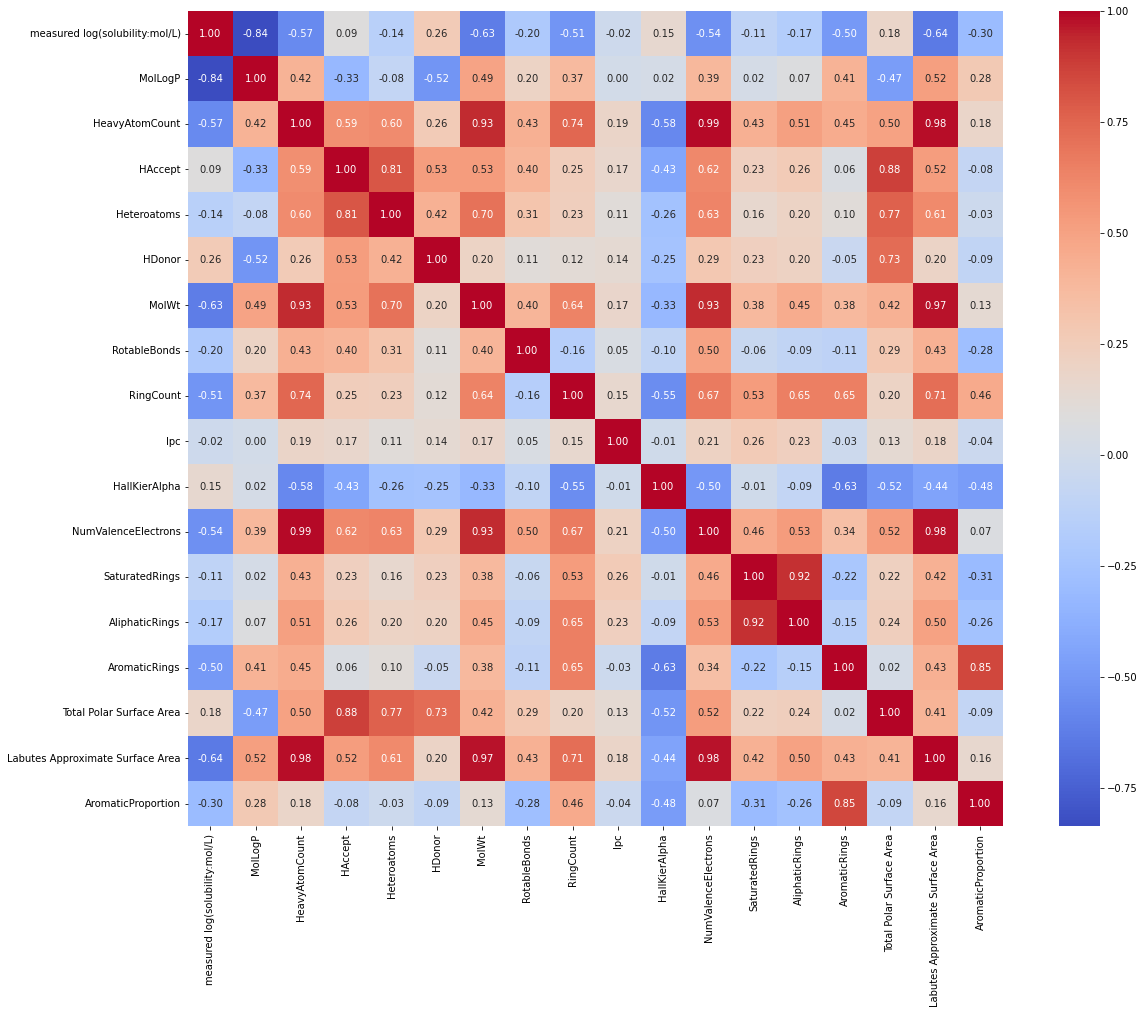

In [40]:
plt.figure()
sns.heatmap(heatmap.corr(), annot=True, fmt='.2f', square=True, cmap='coolwarm')

fig = plt.gcf()

fig.set_size_inches(20, 15)
#corr = np.corrcoef(np.random.randn(10, 200))
#mask = np.zeros_like(corr)
#mask[np.triu_indices_from(mask)] = True
#with sns.axes_style("white"):
 #   f, ax = plt.subplots(figsize=(7, 5))
  #  ax = sns.heatmap(sol, mask=mask, vmax=.3, square=True)
#plt.dpi=1200
#for label in (ax.get_xticklabels() + ax.get_yticklabels()):
#	label.set_fontsize(16)
plt.savefig('papersolubility.pdf',bbox_inches='tight',dpi = 1000)

plt.show()



In [21]:
model.feature_importances_

array([0.76937079, 0.00378621, 0.00648667, 0.01991466, 0.00480077,
       0.0300327 , 0.01196322, 0.00663285, 0.04314677, 0.02022787,
       0.00591139, 0.0018222 , 0.00194683, 0.00242829, 0.02421381,
       0.03926998, 0.00804498])

In [35]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


In [23]:
import shap

C:\Users\DEDP Grader\anaconda3\envs\rdkit\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [24]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

In [26]:
explainer = shap.Explainer(model)
shap_values = explainer(X_test)

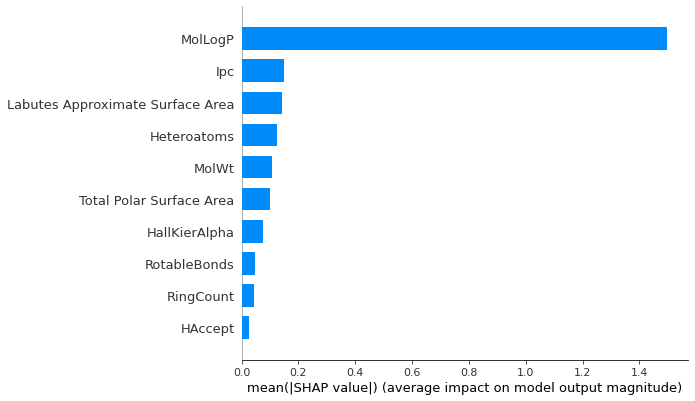

In [74]:
shap.summary_plot(shap_values, X_test, plot_type="bar",show=False,max_display=10,plot_size=0.5)

#plot_size=(18.0, 10.0)
plt.savefig('scratch.pdf',bbox_inches='tight',dpi = 1000)

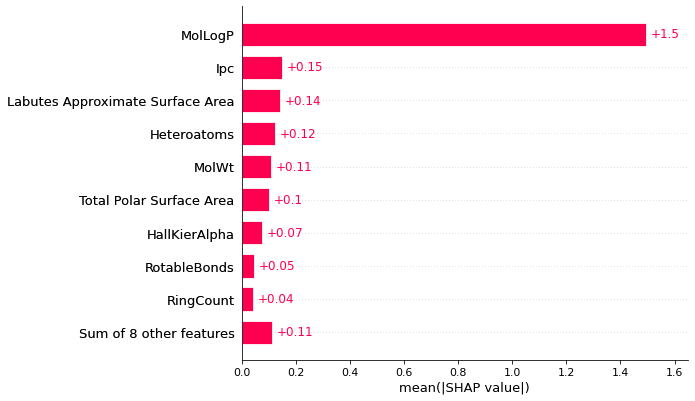

In [75]:
shap.plots.bar(shap_values, max_display=10,show=False)
plt.savefig('scratcch.pdf',bbox_inches='tight',dpi = 1000)

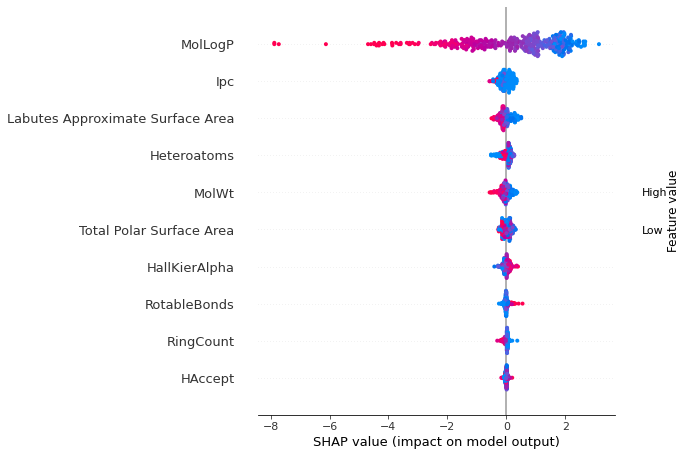

In [78]:
shap.summary_plot(shap_values, X_test, plot_type="dot", plot_size=0.6, show=False,max_display=10)
plt.savefig('scratcch.pdf',bbox_inches='tight',dpi = 1000)

Text(0.5, 1.0, 'BOZ')

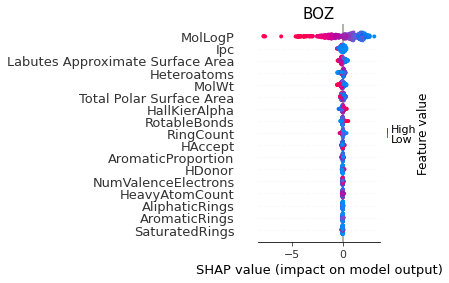

In [33]:
ax0= plt.subplot(1,2,1)
shap.summary_plot(shap_values, X_test, plot_type="dot", plot_size=None, show=False)
ax0.set_title("BOZ", fontsize=15)

Feature: 0, Score: 0.76937
Feature: 1, Score: 0.00379
Feature: 2, Score: 0.00649
Feature: 3, Score: 0.01991
Feature: 4, Score: 0.00480
Feature: 5, Score: 0.03003
Feature: 6, Score: 0.01196
Feature: 7, Score: 0.00663
Feature: 8, Score: 0.04315
Feature: 9, Score: 0.02023
Feature: 10, Score: 0.00591
Feature: 11, Score: 0.00182
Feature: 12, Score: 0.00195
Feature: 13, Score: 0.00243
Feature: 14, Score: 0.02421
Feature: 15, Score: 0.03927
Feature: 16, Score: 0.00804


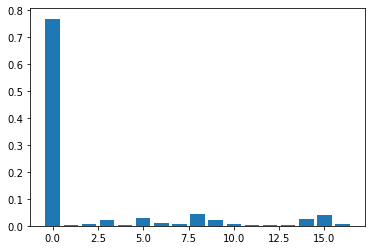

In [26]:
import pandas as pd
from matplotlib import pyplot

importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

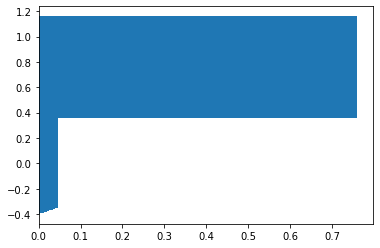

In [41]:
features=model.feature_importances_
f_i = list(zip(features,model.feature_importances_))
f_i.sort(key = lambda x : x[1])
plt.barh([x[0] for x in f_i],[x[1] for x in f_i])

plt.show()

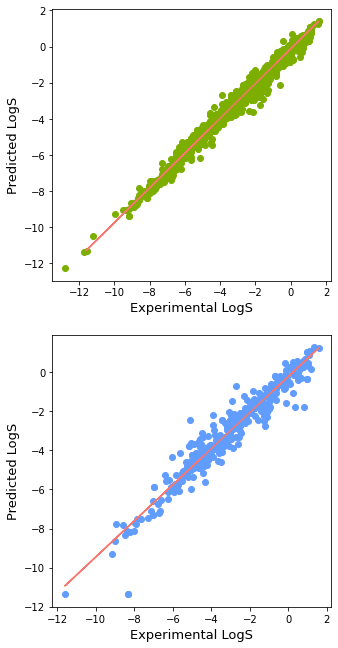

In [28]:
#Vertical plot
plt.figure(figsize=(5,11))

# 2 row, 1 column, plot 1
plt.subplot(2, 1, 1)
plt.scatter(x=Y_train, y=Y_pred_train, c="#7CAE00", alpha=1)

# Add trendline
# https://stackoverflow.com/questions/26447191/how-to-add-trendline-in-python-matplotlib-dot-scatter-graphs
z = np.polyfit(Y_train, Y_pred_train, 1)
p = np.poly1d(z)
plt.plot(Y_test,p(Y_test),"#F8766D")


plt.xlabel('Experimental LogS', fontsize=13)
plt.ylabel('Predicted LogS', fontsize=13)


# 2 row, 1 column, plot 2
plt.subplot(2, 1, 2)
plt.scatter(x=Y_test, y=Y_pred_test, c="#619CFF", alpha=1)

z = np.polyfit(Y_test, Y_pred_test, 1)
p = np.poly1d(z)
plt.plot(Y_test,p(Y_test),"#F8766D")

plt.ylabel('Predicted LogS', fontsize=13)
plt.xlabel('Experimental LogS', fontsize=13)

plt.savefig('plot_vertical_logS.png')
plt.savefig('paper logS descriptor.pdf',dpi=1200)
plt.show()

In [19]:
testdata = pd.read_csv('D:/python/rdkit/testexperiment2.csv')
testdata

,Substance,SMILES,rdkit,morgan
0,1_naphthol,c1ccc2c(cccc2O)c1,-3.82,-2.97
1,2_amino_5_bromobenzoic_acid,Brc1cc(C(O)=O)c(N)cc1,-2.96,-3.42
2,4_iodophenol,c1cc(ccc1O)I,-2.88,-1.44
3,5_bromo_2_4_dihydroxybenzoic_acid,Oc1c(Br)cc(C(O)=O)c(O)c1,-2.60,-3.49
4,5_fluorouracil,Fc1c(=O)[nH]c(=O)[nH]c1,-1.19,-1.35
...,...,...,...,...
95,trimethoprim,c1(nc(c(cn1)Cc1cc(c(c(OC)c1)OC)OC)N)N,-3.71,-3.34
96,trimipramine,CC(CN(C)C)CN1c2ccccc2CCc2ccccc12,-3.47,-3.27
97,tryptamine,NCCc1c[nH]c2ccccc12,-2.63,-3.35
98,verapamil,COc1ccc(CCN(C)CCCC(C#N)(C(C)C)c2ccc(OC)c(OC)c2...,-3.74,-3.41


In [20]:
moleculestest = testdata.SMILES.apply(Chem.MolFromSmiles)

In [21]:
testdata.loc[:, 'MolLogP'] = moleculestest.apply(Descriptors.MolLogP)
testdata.loc[:, 'HeavyAtomCount'] = moleculestest.apply(Descriptors.HeavyAtomCount)
testdata.loc[:, 'HAccept'] = moleculestest.apply(Descriptors.NumHAcceptors)
testdata.loc[:, 'Heteroatoms'] = moleculestest.apply(Descriptors.NumHeteroatoms)
testdata.loc[:, 'HDonor'] = moleculestest.apply(Descriptors.NumHDonors)
testdata.loc[:, 'MolWt'] = moleculestest.apply(Descriptors.MolWt)
testdata.loc[:, 'RotableBonds'] = moleculestest.apply(Descriptors.NumRotatableBonds)
testdata.loc[:, 'RingCount'] = moleculestest.apply(Descriptors.RingCount)
testdata.loc[:, 'Ipc'] = moleculestest.apply(Descriptors.Ipc)
testdata.loc[:, 'HallKierAlpha'] = moleculestest.apply(Descriptors.HallKierAlpha)
testdata.loc[:, 'NumValenceElectrons'] = moleculestest.apply(Descriptors.NumValenceElectrons)
testdata.loc[:, 'SaturatedRings'] = moleculestest.apply(Descriptors.NumSaturatedRings)
testdata.loc[:, 'AliphaticRings'] = moleculestest.apply(Descriptors.NumAliphaticRings)
testdata.loc[:, 'AromaticRings'] = moleculestest.apply(Descriptors.NumAromaticRings)
testdata.loc[:, 'Total Polar Surface Area'] = moleculestest.apply(Descriptors.TPSA)
testdata.loc[:, 'Labutes Approximate Surface Area'] = moleculestest.apply(Descriptors.LabuteASA)

In [22]:
testdata.head()

,Substance,SMILES,rdkit,morgan,MolLogP,HeavyAtomCount,HAccept,Heteroatoms,HDonor,MolWt,RotableBonds,RingCount,Ipc,HallKierAlpha,NumValenceElectrons,SaturatedRings,AliphaticRings,AromaticRings,Total Polar Surface Area,Labutes Approximate Surface Area
0,1_naphthol,c1ccc2c(cccc2O)c1,-3.82,-2.97,2.5454,11,1,1,1,144.173,0,2,505.763735,-1.50,54,0,0,2,20.23,64.907301
1,2_amino_5_bromobenzoic_acid,Brc1cc(C(O)=O)c(N)cc1,-2.96,-3.42,1.7295,11,2,4,2,216.034,1,1,267.188810,-1.03,58,0,0,1,63.32,71.959539
2,4_iodophenol,c1cc(ccc1O)I,-2.88,-1.44,1.9968,8,1,2,1,220.009,0,1,70.798924,-0.25,42,0,0,1,20.23,61.487475
3,5_bromo_2_4_dihydroxybenzoic_acid,Oc1c(Br)cc(C(O)=O)c(O)c1,-2.60,-3.49,1.5585,12,3,5,3,233.017,1,1,393.598326,-1.23,64,0,0,1,77.76,76.208116
4,5_fluorouracil,Fc1c(=O)[nH]c(=O)[nH]c1,-1.19,-1.35,-0.7977,9,2,5,2,130.078,0,1,104.200919,-1.39,48,0,0,1,65.72,48.359279


In [23]:
mol_list2= []
for element in testdata.SMILES:
  mol = Chem.MolFromSmiles(element)
  mol_list2.append(mol)

In [24]:
def AromaticAtoms(m):
  aromatic_atoms = [m.GetAtomWithIdx(i).GetIsAromatic() for i in range(m.GetNumAtoms())]
  aa_count = []
  for i in aromatic_atoms:
    if i==True:
      aa_count.append(1)
  sum_aa_count = sum(aa_count)
  return sum_aa_count

In [25]:
desc_AromaticAtoms2 = [AromaticAtoms(element) for element in mol_list2]
#desc_AromaticAtoms2

In [26]:
desc_HeavyAtomCount2 = [Descriptors.HeavyAtomCount(element) for element in mol_list2]
#desc_HeavyAtomCount2

In [27]:
desc_AromaticProportion2 = [AromaticAtoms(element)/Descriptors.HeavyAtomCount(element) for element in mol_list2]
#desc_AromaticProportion2

In [28]:
df_desc_AromaticProportion2 = pd.DataFrame(desc_AromaticProportion2, columns=['AromaticProportion'])
df_desc_AromaticProportion2

,AromaticProportion
0,0.909091
1,0.545455
2,0.750000
3,0.500000
4,0.666667
...,...
95,0.571429
96,0.545455
97,0.750000
98,0.363636


In [31]:
dt=testdata.iloc[:,4:]
dt

,MolLogP,HeavyAtomCount,HAccept,Heteroatoms,HDonor,MolWt,RotableBonds,RingCount,Ipc,HallKierAlpha,NumValenceElectrons,SaturatedRings,AliphaticRings,AromaticRings,Total Polar Surface Area,Labutes Approximate Surface Area
0,2.54540,11,1,1,1,144.173,0,2,5.057637e+02,-1.50,54,0,0,2,20.23,64.907301
1,1.72950,11,2,4,2,216.034,1,1,2.671888e+02,-1.03,58,0,0,1,63.32,71.959539
2,1.99680,8,1,2,1,220.009,0,1,7.079892e+01,-0.25,42,0,0,1,20.23,61.487475
3,1.55850,12,3,5,3,233.017,1,1,3.935983e+02,-1.23,64,0,0,1,77.76,76.208116
4,-0.79770,9,2,5,2,130.078,0,1,1.042009e+02,-1.39,48,0,0,1,65.72,48.359279
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1.25760,21,7,7,2,290.323,5,2,5.223023e+04,-2.70,112,0,0,2,105.51,122.407979
96,4.12100,22,2,2,0,294.442,4,3,1.260630e+05,-1.80,116,0,1,2,6.48,133.921870
97,1.66910,12,1,2,2,160.220,2,2,1.058269e+03,-1.28,62,0,0,2,41.81,71.392003
98,5.09308,33,6,6,0,454.611,13,2,1.577787e+07,-2.91,180,0,0,2,63.95,198.569223


In [32]:

dtnew = pd.concat([dt,df_desc_AromaticProportion2], axis=1)
dtnew

,MolLogP,HeavyAtomCount,HAccept,Heteroatoms,HDonor,MolWt,RotableBonds,RingCount,Ipc,HallKierAlpha,NumValenceElectrons,SaturatedRings,AliphaticRings,AromaticRings,Total Polar Surface Area,Labutes Approximate Surface Area,AromaticProportion
0,2.54540,11,1,1,1,144.173,0,2,5.057637e+02,-1.50,54,0,0,2,20.23,64.907301,0.909091
1,1.72950,11,2,4,2,216.034,1,1,2.671888e+02,-1.03,58,0,0,1,63.32,71.959539,0.545455
2,1.99680,8,1,2,1,220.009,0,1,7.079892e+01,-0.25,42,0,0,1,20.23,61.487475,0.750000
3,1.55850,12,3,5,3,233.017,1,1,3.935983e+02,-1.23,64,0,0,1,77.76,76.208116,0.500000
4,-0.79770,9,2,5,2,130.078,0,1,1.042009e+02,-1.39,48,0,0,1,65.72,48.359279,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1.25760,21,7,7,2,290.323,5,2,5.223023e+04,-2.70,112,0,0,2,105.51,122.407979,0.571429
96,4.12100,22,2,2,0,294.442,4,3,1.260630e+05,-1.80,116,0,1,2,6.48,133.921870,0.545455
97,1.66910,12,1,2,2,160.220,2,2,1.058269e+03,-1.28,62,0,0,2,41.81,71.392003,0.750000
98,5.09308,33,6,6,0,454.611,13,2,1.577787e+07,-2.91,180,0,0,2,63.95,198.569223,0.363636


In [33]:

# make a prediction
Xnew=dtnew
ynew = model.predict(Xnew)
#print("X=%s, Predicted=%s" % (Xnew[0], ynew[0]))
ynew

array([-2.22115   , -2.2264547 , -1.56456867, -2.22677998, -1.023375  ,
       -1.1534874 , -2.31062025, -1.76463524, -2.18624723, -6.89803964,
       -5.24493917, -6.08081016, -2.13941893, -2.19982243, -2.8081148 ,
       -1.52605327, -3.906076  , -3.64598411, -4.63452876, -4.06589893,
       -3.04875018, -4.46645706, -5.16828647, -3.0005166 , -6.46061147,
       -2.4048538 , -1.4882817 , -5.0530162 , -3.21685999, -2.06636619,
       -4.26650386, -2.96737066, -4.58140428, -4.32874962, -3.83815485,
       -3.87056363, -3.90878451, -3.37427659, -2.33577487, -4.0220388 ,
       -4.69255213, -3.35237518, -3.9552701 , -5.06829787, -3.22400638,
       -2.225001  , -2.9713979 , -1.10640244, -3.51661818, -2.03689643,
       -2.7388804 , -5.04311304,  0.36242   , -5.00378801, -7.12732448,
       -3.8728768 , -3.4119886 , -1.24332079, -7.39460656, -3.2019635 ,
       -3.14294087, -4.0639374 , -4.4813557 , -3.17675017, -3.10555837,
       -4.71631775, -2.03689643, -3.716111  , -2.72427533, -4.12